<a href="https://colab.research.google.com/github/Eieiz007/Deep-learning/blob/main/GRU_Many_to_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import tensorflow as tf
import pandas as pd

import tensorflow as tf

from tensorflow.keras.optimizers import Adam , AdamW
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , GRU , SimpleRNN
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler

Create data

In [3]:
num_days = 700
dates = pd.date_range(start="2020-01-01", periods=num_days, freq="D")
oil_prices = 50 + 5 * np.sin(np.linspace(0, 20, num_days)) + np.random.normal(0, 1, num_days)
temperature = 30 + 10 * np.sin(np.linspace(0, 10, num_days)) + np.random.normal(0, 1, num_days)

df = pd.DataFrame({"Date": dates, "Oil_Price": oil_prices, "Temperature": temperature})

df.head()

Date  Oil_Price  Temperature
0 2020-01-01  49.361114    29.821631
1 2020-01-02  47.327098    31.984459
2 2020-01-03  50.471481    28.772078
3 2020-01-04  50.860664    29.625199
4 2020-01-05  51.662499    31.072613

prepartation data

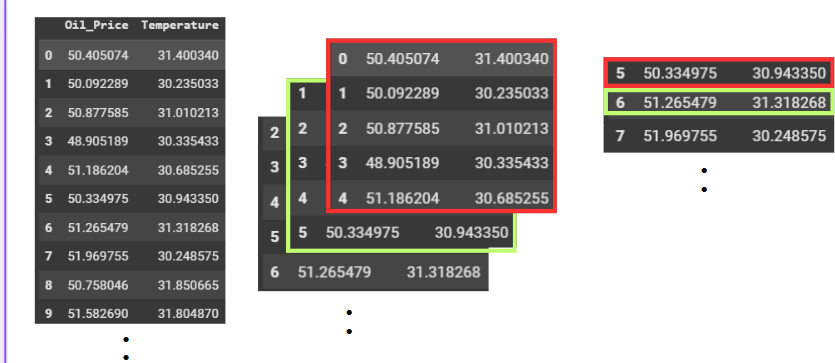

In [4]:
time_step = 20 #‡πÉ‡∏ä‡πâ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡πà‡∏≠‡∏ô‡∏´‡∏ô‡πâ‡∏≤ 5 ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢


In [5]:
# iloc[row,column]
#len(row) - time_step = n_subsets
print(len(df))


# y = 6 , x = [1,2,3,4,5]
# y = 7 , x = [2,3,4,5,6]
# ..............
# y = 500 , x = [495,496,497,498,499] 495 subsets


700


In [6]:
X, y = [], []

for i in range(len(df) - time_step):
    X.append(df.iloc[i:i+time_step, 1:].values)  # ‡πÉ‡∏ä‡πâ‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå Oil_Price ‡πÅ‡∏•‡∏∞ Temperature
    # iloc[0:1+5] = [0 1 2 3 4]
    y.append(df.iloc[i+time_step, 1:].values)   # Target ‡∏Ñ‡∏∑‡∏≠‡∏Ñ‡πà‡∏≤‡∏Ç‡∏≠‡∏á‡∏ß‡∏±‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ
    # iloc[0+5] = [6]


In [7]:
X[:2]

[array([[49.36111443, 29.82163062],
        [47.32709791, 31.98445864],
        [50.4714807 , 28.77207769],
        [50.8606636 , 29.62519926],
        [51.66249909, 31.07261324],
        [49.50326704, 31.10361722],
        [51.45803316, 29.75437612],
        [50.05490561, 30.55888623],
        [52.37183969, 30.78160118],
        [50.73799358, 32.01343967],
        [49.71719355, 30.82450291],
        [53.92715899, 29.77748039],
        [50.62727986, 31.72839111],
        [50.73927192, 32.62949692],
        [53.62843282, 31.20811901],
        [52.40247673, 33.30116778],
        [53.20328452, 30.61938467],
        [52.73057304, 32.49753909],
        [52.83214864, 32.36551049],
        [51.82061355, 31.2427042 ]]),
 array([[47.32709791, 31.98445864],
        [50.4714807 , 28.77207769],
        [50.8606636 , 29.62519926],
        [51.66249909, 31.07261324],
        [49.50326704, 31.10361722],
        [51.45803316, 29.75437612],
        [50.05490561, 30.55888623],
        [52.37183969, 30.7

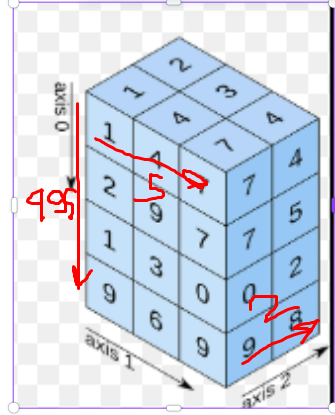

In [8]:
# ‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô numpy array
X = np.array(X)
y = np.array(y)

# ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö shape
X.shape, y.shape

((680, 20, 2), (680, 2))

splitting data

In [28]:
# ‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• Train (70%) ‡πÅ‡∏•‡∏∞ (Val+Test) (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, shuffle=False) #‡∏´‡πâ‡∏≤‡∏°‡∏™‡∏∏‡πà‡∏°‡πÄ‡∏û‡∏£‡∏≤‡∏∞‡πÄ‡∏õ‡πá‡∏ô time series
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [29]:
X_train.reshape(-1, X_train.shape[-1]) #‡∏•‡∏î‡πÉ‡∏´‡πâ‡πÄ‡∏´‡∏•‡∏∑‡∏≠ 2D ‡πÄ‡∏û‡∏£‡∏≤‡∏∞ standardization must 2d

array([[49.36111443, 29.82163062],
       [47.32709791, 31.98445864],
       [50.4714807 , 28.77207769],
       ...,
       [48.50076725, 26.77767847],
       [49.71066184, 26.63699056],
       [49.7758634 , 26.98384719]])

In [30]:
#‡πÅ‡∏õ‡∏•‡∏á‡∏Å‡∏•‡∏±‡∏ö
X_train.reshape(-1, X_train.shape[-1]).reshape(X_train.shape)[:2] # == x_train ‡πÅ‡∏õ‡∏•‡∏á‡∏Å‡∏•‡∏±‡∏ö‡∏°‡∏≤ 3D ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°

array([[[49.36111443, 29.82163062],
        [47.32709791, 31.98445864],
        [50.4714807 , 28.77207769],
        [50.8606636 , 29.62519926],
        [51.66249909, 31.07261324],
        [49.50326704, 31.10361722],
        [51.45803316, 29.75437612],
        [50.05490561, 30.55888623],
        [52.37183969, 30.78160118],
        [50.73799358, 32.01343967],
        [49.71719355, 30.82450291],
        [53.92715899, 29.77748039],
        [50.62727986, 31.72839111],
        [50.73927192, 32.62949692],
        [53.62843282, 31.20811901],
        [52.40247673, 33.30116778],
        [53.20328452, 30.61938467],
        [52.73057304, 32.49753909],
        [52.83214864, 32.36551049],
        [51.82061355, 31.2427042 ]],

       [[47.32709791, 31.98445864],
        [50.4714807 , 28.77207769],
        [50.8606636 , 29.62519926],
        [51.66249909, 31.07261324],
        [49.50326704, 31.10361722],
        [51.45803316, 29.75437612],
        [50.05490561, 30.55888623],
        [52.37183969, 30.7

In [32]:

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£ StandardScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit transform ‡∏Å‡∏±‡∏ö Training data ‡πÅ‡∏•‡∏∞ Transform ‡∏ä‡∏∏‡∏î‡∏≠‡∏∑‡πà‡∏ô ‡πÜ
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = scaler_X.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

y_train_scaled = scaler_y.fit_transform(y_train) #y ‡∏ï‡πâ‡∏≠‡∏á‡πÅ‡∏õ‡∏•‡∏á‡∏î‡πâ‡∏ß‡∏¢‡πÄ‡∏û‡∏£‡∏≤‡∏∞ ‡πÄ‡∏Å‡∏¥‡∏î‡∏à‡∏≤‡∏Å ‡∏ß‡∏±‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ‡∏Ç‡∏≠‡∏á time_step ‡∏ó‡∏µ‡∏ï‡∏±‡πâ‡∏á‡πÄ‡∏≠‡∏≤‡πÑ‡∏ß‡πâ ‡∏Ñ‡πà‡∏≤‡∏°‡∏±‡∏ô‡πÄ‡∏¢‡∏≠‡∏∞
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

# ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö shape
print("Train shape:", X_train_scaled.shape, y_train_scaled.shape)
print("Validation shape:", X_val_scaled.shape, y_val_scaled.shape)
print("Test shape:", X_test_scaled.shape, y_test_scaled.shape)


Train shape: (408, 20, 2) (408, 2)
Validation shape: (136, 20, 2) (136, 2)
Test shape: (136, 20, 2) (136, 2)


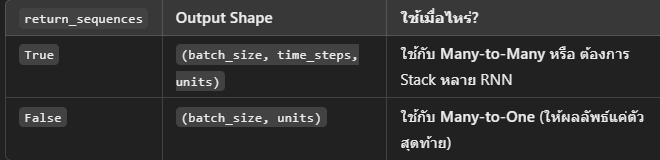

In [37]:
X_train_scaled.shape

(408, 20, 2)

In [33]:
"""
Many to one  = return_sequences=False
input_shape = (time_steps, features)

"""

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• LSTM (Many-to-One)
model = Sequential([
    GRU(256, activation='gelu', return_sequences=False, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dense(128, activation='gelu'), #FC
    Dense(64, activation='gelu'), #FC
    # BacthNormalization()
    Dense(2)  # Output 2 ‡∏Ñ‡πà‡∏≤ (Oil_Price, Temperature)
])

# ‡∏Ñ‡∏≠‡∏°‡πÑ‡∏û‡∏•‡πå‡πÇ‡∏°‡πÄ‡∏î‡∏•
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Train ‡πÇ‡∏°‡πÄ‡∏î‡∏•
history = model.fit(X_train_scaled, y_train_scaled,
                    validation_data=(X_val_scaled, y_val_scaled),
                    epochs=50, batch_size=None, verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 57ms/step - loss: 0.3439 - val_loss: 0.4844
Epoch 2/50
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step - loss: 0.2914 - val_loss: 0.4187
Epoch 3/50
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 37ms/step - loss: 0.2598 - val_loss: 0.3419
Epoch 4/50
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step - loss: 0.1985 - val_loss: 0.2485
Epoch 5/50
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 35ms/step - loss: 0.1493 - val_loss: 0.1390
Epoch 6/50
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 37ms/step - loss: 0.0846 - val_loss: 0.0406
Epoch 7/50
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 37ms/step - loss: 0.0449 - val_loss: 0.0121
Epoch 8/50
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step - loss: 0.0406 - val_loss: 0.0137
Epoch 9/50


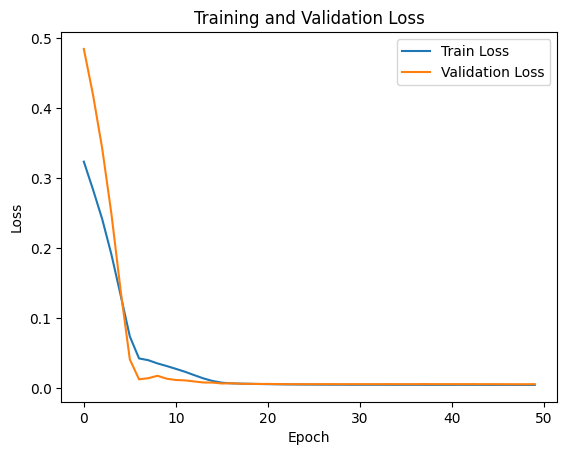

In [34]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [38]:
# ‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏Å‡∏±‡∏ö Test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred_scaled[:5]

5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step


array([[0.39184454, 0.88611686],
       [0.38168883, 0.8753141 ],
       [0.37997597, 0.8807571 ],
       [0.37141997, 0.8727324 ],
       [0.3440265 , 0.88504165]], dtype=float32)

In [39]:
# ‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡πà‡∏≤‡∏Å‡∏•‡∏±‡∏ö‡πÄ‡∏õ‡πá‡∏ô‡∏™‡πÄ‡∏Å‡∏•‡πÄ‡∏î‡∏¥‡∏°
y_pred = scaler_y.inverse_transform(y_pred_scaled) #Nomalization ‡πÑ‡∏°‡πà‡∏ï‡πâ‡∏≠‡∏á‡πÅ‡∏õ‡∏•‡∏á‡∏Å‡∏•‡∏±‡∏ö
y_test = scaler_y.inverse_transform(y_test_scaled)
y_pred[:5] ,y_test[:5]

(array([[48.238937, 39.140663],
        [48.092205, 38.890095],
        [48.067455, 39.016342],
        [47.943836, 38.830215],
        [47.548046, 39.115723]], dtype=float32),
 array([[47.91255111, 38.29208344],
        [48.41459256, 40.11161818],
        [47.80910568, 38.38518212],
        [46.51668584, 40.42477621],
        [47.59460358, 38.78783602]]))

In [40]:
df_result = pd.DataFrame({'Actual_Oil': y_test[:, 0], 'Predicted_Oil': y_pred[:, 0],
                          'Actual_Temp': y_test[:, 1], 'Predicted_Temp': y_pred[:, 1]})
df_result

Actual_Oil  Predicted_Oil  Actual_Temp  Predicted_Temp
0     47.912551      48.238937    38.292083       39.140663
1     48.414593      48.092205    40.111618       38.890095
2     47.809106      48.067455    38.385182       39.016342
3     46.516686      47.943836    40.424776       38.830215
4     47.594604      47.548046    38.787836       39.115723
..          ...            ...          ...             ...
131   54.260274      54.739761    22.350788       24.933319
132   56.357081      54.683701    24.722345       24.320961
133   55.295084      55.020065    24.667320       24.193048
134   55.290552      55.087151    25.003341       24.160538
135   55.733405      55.121765    23.109638       24.214367

[136 rows x 4 columns]

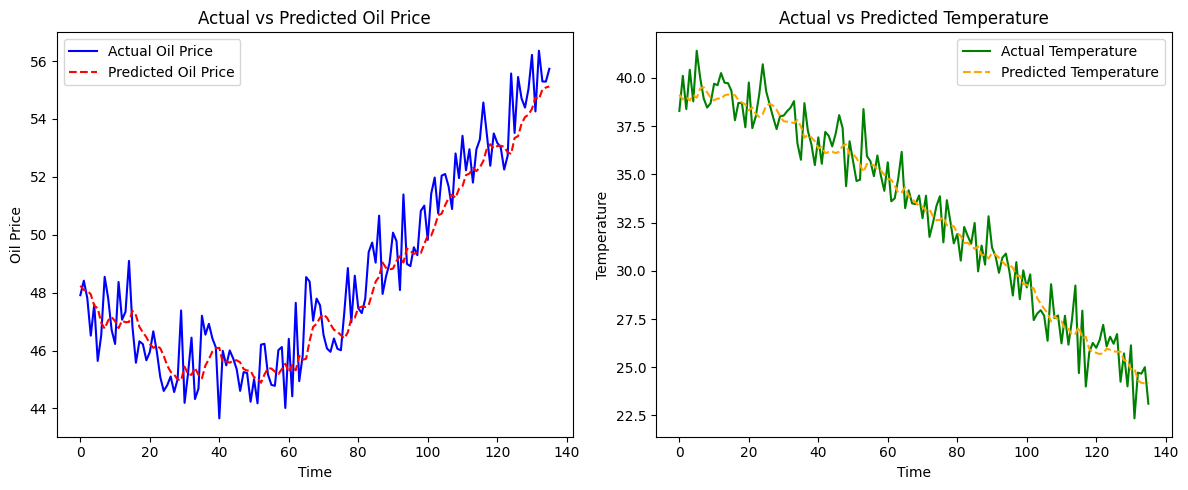

In [41]:

# ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.figure(figsize=(12, 5))

# üîπ Plot ‡∏£‡∏≤‡∏Ñ‡∏≤‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô (Oil Price)
plt.subplot(1, 2, 1)  # 1 ‡πÅ‡∏ñ‡∏ß 2 ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå ‡∏Å‡∏£‡∏≤‡∏ü‡πÅ‡∏£‡∏Å
plt.plot(df_result['Actual_Oil'], label='Actual Oil Price', color='blue')
plt.plot(df_result['Predicted_Oil'], label='Predicted Oil Price', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.title('Actual vs Predicted Oil Price')
plt.legend()

# üîπ Plot ‡∏≠‡∏∏‡∏ì‡∏´‡∏†‡∏π‡∏°‡∏¥ (Temperature)
plt.subplot(1, 2, 2)  # ‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà‡∏™‡∏≠‡∏á
plt.plot(df_result['Actual_Temp'], label='Actual Temperature', color='green')
plt.plot(df_result['Predicted_Temp'], label='Predicted Temperature', color='orange', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.tight_layout()
plt.show()


In [42]:
# üîπ ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì Mean Absolute Percentage Error (MAPE) ‡πÄ‡∏õ‡πá‡∏ô Accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape  # ‡∏Ñ‡∏¥‡∏î‡πÄ‡∏õ‡πá‡∏ô % ‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥

print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 97.75%


In [43]:
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse_test)

Test MSE: 1.1857548496119583


In [44]:
mse_test = model.evaluate(X_test_scaled, y_pred_scaled)
print("Test MSE:", mse_test)

5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - loss: 1.3313e-15
Test MSE: 1.235939442898403e-15


In [45]:
# ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏•‡πà‡∏≤‡∏™‡∏∏‡∏î‡∏à‡∏≤‡∏Å Test Set
latest_input = X_test_scaled[-1:]  # ‡πÄ‡∏≠‡∏≤‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏∏‡∏î‡∏ó‡πâ‡∏≤‡∏¢ (shape = (1, time_step, features))

# ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ß‡∏±‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ
predicted_next_scaled = model.predict(latest_input)

# ‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡πà‡∏≤‡∏Å‡∏•‡∏±‡∏ö‡πÄ‡∏õ‡πá‡∏ô‡∏™‡πÄ‡∏Å‡∏•‡πÄ‡∏î‡∏¥‡∏°
predicted_next = scaler_y.inverse_transform(predicted_next_scaled)

# ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•
print(f"‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡∏ß‡∏±‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ:")
print(f"‡∏£‡∏≤‡∏Ñ‡∏≤‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô (Oil Price): {predicted_next[0,0]:.2f}")
print(f"‡∏≠‡∏∏‡∏ì‡∏´‡∏†‡∏π‡∏°‡∏¥ (Temperature): {predicted_next[0,1]:.2f}")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step
‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡∏ß‡∏±‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ:
‡∏£‡∏≤‡∏Ñ‡∏≤‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô (Oil Price): 55.12
‡∏≠‡∏∏‡∏ì‡∏´‡∏†‡∏π‡∏°‡∏¥ (Temperature): 24.21


‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô



```
Initial Hidden State: h_0 (‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏Ç‡∏ô‡∏≤‡∏î 50)
                                        ‚Üì ‡πÉ‡∏ä‡πâ‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡πà‡∏≤‡∏ï‡∏±‡πâ‡∏á‡∏ï‡πâ‡∏ô timestep 1
Timestep 1
Input [‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà 1 ‡∏Ç‡∏≠‡∏á subset 1]  ‚Üí Hidden State 50 node (h_1)  
                                       ‚Üì ‡∏™‡πà‡∏á‡∏Ñ‡πà‡∏≤‡∏ï‡πà‡∏≠‡πÑ‡∏õ timestep 2
Timestep 2
Input [‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà 2 ‡∏Ç‡∏≠‡∏á subset 1]  ‚Üí Hidden State 50 node (h_2)  
                                       ‚Üì ‡∏™‡πà‡∏á‡∏Ñ‡πà‡∏≤‡∏ï‡πà‡∏≠‡πÑ‡∏õ timestep 3
Timestep 3
Input [‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà 3 ‡∏Ç‡∏≠‡∏á subset 1]  ‚Üí Hidden State 50 node (h_3)  
                                       ‚Üì ‡∏™‡πà‡∏á‡∏Ñ‡πà‡∏≤‡∏ï‡πà‡∏≠‡πÑ‡∏õ timestep 4
Timestep 4
Input [‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà 4 ‡∏Ç‡∏≠‡∏á subset 1]  ‚Üí Hidden State 50 node (h_4)  
                                       ‚Üì ‡∏™‡πà‡∏á‡∏Ñ‡πà‡∏≤‡∏ï‡πà‡∏≠‡πÑ‡∏õ timestep 5
Timestep 5
Input [‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà 5 ‡∏Ç‡∏≠‡∏á subset 1]  ‚Üí Hidden State 50 node (h_5)  ‚Üí Fully Connected ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà 6

```



‡πÄ‡∏õ‡πá‡∏ô 50 ‡∏ï‡∏±‡∏ß‡πÄ‡∏î‡∏¥‡∏° ‡πÅ‡∏•‡∏∞‡πÄ‡∏™‡πâ‡∏ô‡πÇ‡∏¢‡∏á‡∏à‡∏∞‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏°‡∏Å‡∏±‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡πÄ‡∏ä‡πà‡∏ô h_1_node_1 >                       h_2_node_1 h_2_node_2 h_2_node_3 h_2_node_.... h_2_node_50